In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import os
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir("D:\Data Science\Titanic Dataset")
data = pd.read_csv('train.csv')
data.describe()
data.head()
data.isnull().any
data.dtypes
pd.crosstab(data.Sex, data.Survived) 

Survived,0,1
Sex,,
female,81,233
male,468,109


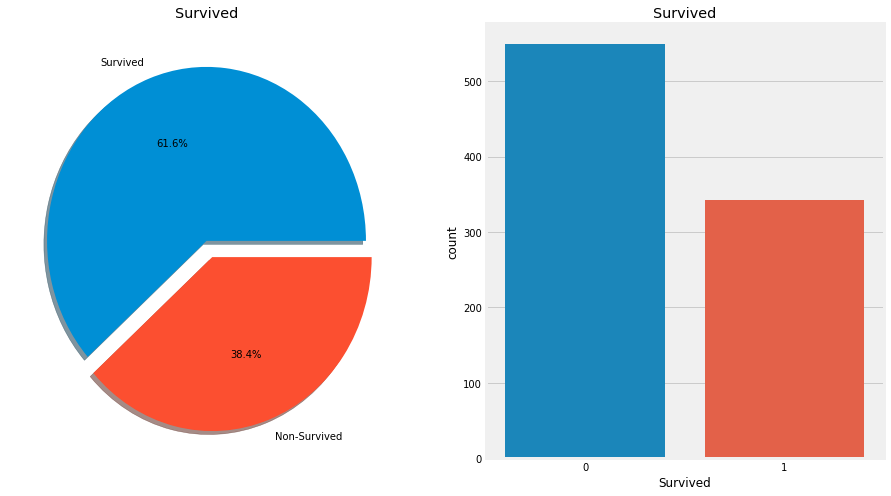

In [5]:
f,ax = plt.subplots(1,2,figsize=(14,8))
labels = 'Survived', 'Non-Survived'
data['Survived'].value_counts().plot.pie(explode = [0, 0.1], labels = labels, autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

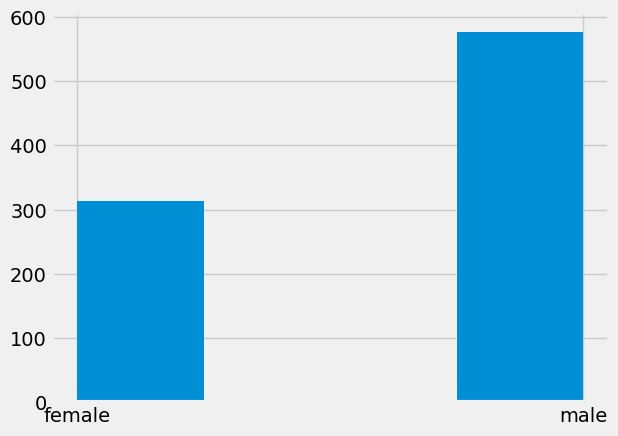

In [4]:
# Plotting histogram
sarr = np.array(data['Sex'])
sarr
plt.hist(sarr, bins = 4)
plt.show()

In [5]:
# Find % of survival or non-survival
b = pd.crosstab(data.Sex, data.Survived)
type(b)
b = b.reset_index()
b['total'] = b.sum(axis = 1)
b
b[0] = (b[0]/ b['total']) * 100
b[1] = (b[1]/ b['total']) * 100
b

Survived,Sex,0,1,total
0,female,25.796178,74.203822,314
1,male,81.109185,18.890815,577


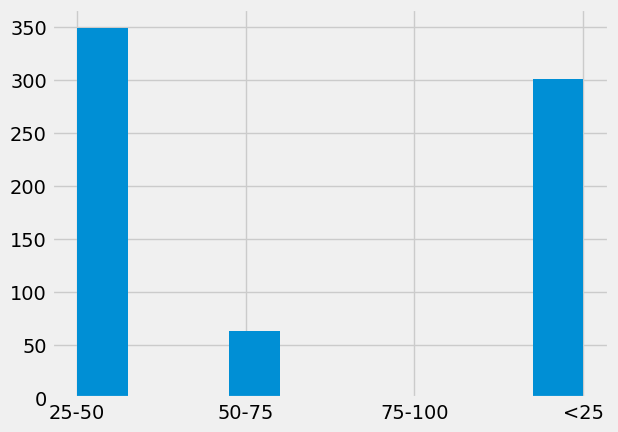

In [6]:
# Histogram of the whole data

data['age_bins'] = pd.cut(data['Age'], bins = [0, 25, 50, 75, 100], labels = ['<25', '25-50','50-75','75-100'])
data.head()
data.isnull().any()  # to check nan/missing values
data.isnull().sum()
type(data['age_bins'])
data['age_bins'].dropna(axis = 0, inplace = True)   # inplace overrides the original answer
data['age_bins'].value_counts()
plt.hist(data['age_bins'])
plt.show()

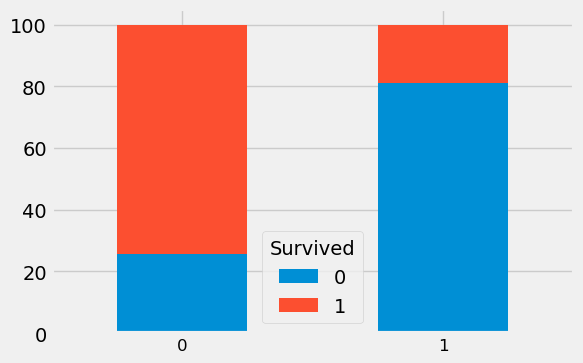

In [7]:
# Plotting stacked plot

# f, ax = plt.subplots(figsize=(4, 3))
b[['Sex',0 , 1]].plot(kind='bar', stacked=True, figsize=(6,4))
plt.xticks(rotation = 360, fontsize= 12)
plt.show()

In [8]:
d = pd.crosstab(data.Survived, data.Embarked)
d = d.reset_index() # Instead of two rows, we get 2 columns or vice versa
d
d['totalem'] = d.sum(axis = 1)
d
d['C'] = (d['C'] / d['totalem']) * 100
d['Q'] = (d['Q'] / d['totalem']) * 100
d['S'] = (d['S'] / d['totalem']) * 100
d = d.round(2)
d

Embarked,Survived,C,Q,S,totalem
0,0,13.66,8.56,77.78,549
1,1,27.27,8.80,63.64,341


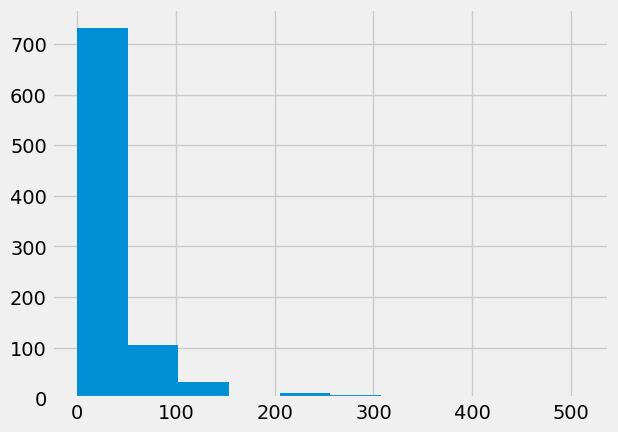

In [9]:
# Distribution of Prices

pricearr = np.array(data['Fare'])
pricearr
plt.hist(pricearr, bins  = 10)
data['Fare'].value_counts()
plt.show()

In [43]:
# Find % survival/non-survival in male v/s  female using age binning and crosstab

data['age_bins'] = pd.cut(data.Age, bins = 4)
e = pd.crosstab(data.Survived, data.age_bins)
e
e = e.reset_index()
#e['totalage'] = e.sum(axis = 1)



ValueError: could not convert string to float: 'Survived'

In [42]:
# Age_bin v/s Survival rate

f = pd.crosstab(data.age_bins, data.Survived)
f
f = f.reset_index()
f
f['totalsurv'] = f[[0,1]].sum(axis = 1)
f
f[0] = (f[0] / f['totalsurv']) * 100
f[1] = (f[1] / f['totalsurv']) * 100
f = f.round(2)
f

Survived,age_bins,0,1,totalsurv
0,"(0.34, 20.315]",54.19,45.81,179
1,"(20.315, 40.21]",60.26,39.74,385
2,"(40.21, 60.105]",60.94,39.06,128
3,"(60.105, 80.0]",77.27,22.73,22


In [32]:
# Parch v/s survival rates
g = pd.crosstab(data.Parch, data.Survived)
g
g = g.reset_index()
g
g['totalparch'] = g.sum(axis = 1)
g
g[0] = (g[0] / g['totalparch']) * 100
g[1] = (g[1] / g['totalparch']) * 100
g = g.round(2)
g

Survived,Parch,0,1,totalparch
0,0,65.63,34.37,678
1,1,44.54,54.62,119
2,2,48.78,48.78,82
3,3,25.00,37.50,8
4,4,50.00,0.00,8
5,5,40.00,10.00,10
6,6,14.29,0.00,7


In [39]:
# Binning fare & comparing with survival rate

fare = np.array(data['Fare'])
fare
bins = [5, 20, 40, 60, 85, 100, 300]
data['fare_bins'] = pd.cut(fare, bins)
data['fare_bins']
a = pd.crosstab(data.fare_bins, data.Survived)
a
a = a.reset_index()
a
a['totalfares'] = a[[0,1]].sum(axis = 1)
a
a[0] = (a[0] / a['totalfares']) * 100
a[1] = (a[1] / a['totalfares']) * 100
a.round(2)
a

Survived,fare_bins,0,1,totalfares
0,"(5, 20]",71.485944,28.514056,498
1,"(20, 40]",57.000000,43.000000,200
2,"(40, 60]",42.592593,57.407407,54
3,"(60, 85]",44.642857,55.357143,56
4,"(85, 100]",7.692308,92.307692,13
5,"(100, 300]",28.000000,72.000000,50
